# Data Exploration

Author: Shanel Gauthier
Date: 2021-12-09

The objective of this notebook is to explore the dataset.


The task associated with the dataset consists of classifying three skin disease types from skin images. The three classes are “acne”, “herpes simplex”, and “lichen planus”. 

In [1]:
import torch
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd

## Dataset Exploration

The first set consist of creating a pandas dataframe.

The dataframe contains these features for each image:
- image path
- label
- width
- heights

In [2]:
images_paths = glob.glob('data_3class_skin_diseases/**/*')
widths, heights=[],[]
labels = []
for image in images_paths:
  width, height = Image.open(image).size
  widths.append(width)
  heights.append(height)
  labels.append(image.split('/')[-2])

In [3]:
df = pd.DataFrame(list(zip(images_paths, labels, widths, heights)), columns =['image_path', 'label', 'width', 'height'])
df

,image_path,label,width,height
0,data_3class_skin_diseases/acne/4-105-11.jpg,acne,700,446
1,data_3class_skin_diseases/acne/4-115-1.jpg,acne,379,566
2,data_3class_skin_diseases/acne/4-105.jpg,acne,420,298
3,data_3class_skin_diseases/acne/4-98-1.jpg,acne,446,700
4,data_3class_skin_diseases/acne/4-98.jpg,acne,298,420
...,...,...,...,...
97,data_3class_skin_diseases/herpes_simplex/8-79.jpg,herpes_simplex,420,298
98,data_3class_skin_diseases/herpes_simplex/8-81-...,herpes_simplex,700,468
99,data_3class_skin_diseases/herpes_simplex/8-69-...,herpes_simplex,700,450
100,data_3class_skin_diseases/herpes_simplex/8-71-...,herpes_simplex,700,450


Now, let's visualize the distribution of the labels, widths and heights. 

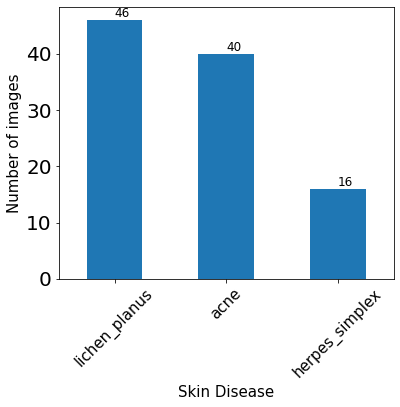

In [9]:
plt.figure(figsize=(6,5))
df['label'].value_counts().plot(kind='bar', rot=45)
plt.xlabel('Skin Disease', fontsize=15)
plt.ylabel('Number of images', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
for index, data in enumerate(df['label'].value_counts()):
  plt.text(x=index, y=data+0.5, s=f'{data}', fontdict=dict(fontsize=12))
plt.show()

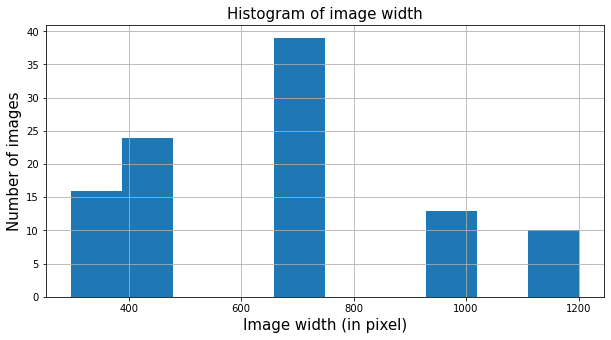

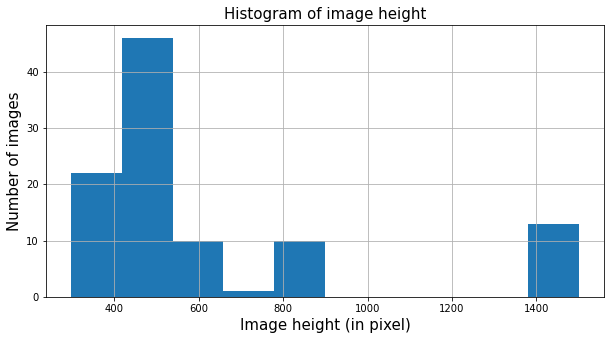

In [11]:
def visualize_histogram(name):
    plt.figure(figsize=(10,5))
    plt.xlabel(f'Image {name} (in pixel)', fontsize=15)
    plt.ylabel('Number of images', fontsize=15)
    plt.title(f'Histogram of image {name}', fontsize=15)
    df[name].hist()
    plt.show()

visualize_histogram('width')
visualize_histogram('height')  

In [12]:
print(f"The minimum and maximum values for the width of all images are {df['width'].min()} and {df['width'].max()} respectively.")
print(f"The minimum and maximum values for the height of all images are {df['height'].min()} and {df['height'].max()} respectively.")

The minimum and maximum values for the width of all images are 298 and 1200 respectively.
The minimum and maximum values for the height of all images are 298 and 1500 respectively.


Now, let's visualize some images.


In [13]:
def visualize_samples(label, num_col = 8, num_row = 2):
  f, ax = plt.subplots(num_row, num_col, figsize=(30,10))
  f.suptitle(f"{label} samples", fontsize=20)
  image_paths_label = df[df['label']==label]['image_path'].values
  count =0
  for i in range(0,num_row):
    for j in range(0,num_col):
      img = mpimg.imread(image_paths_label[count])
      ax[i,j].imshow(img)
      ax[i,j].axis('off')
      count+=1


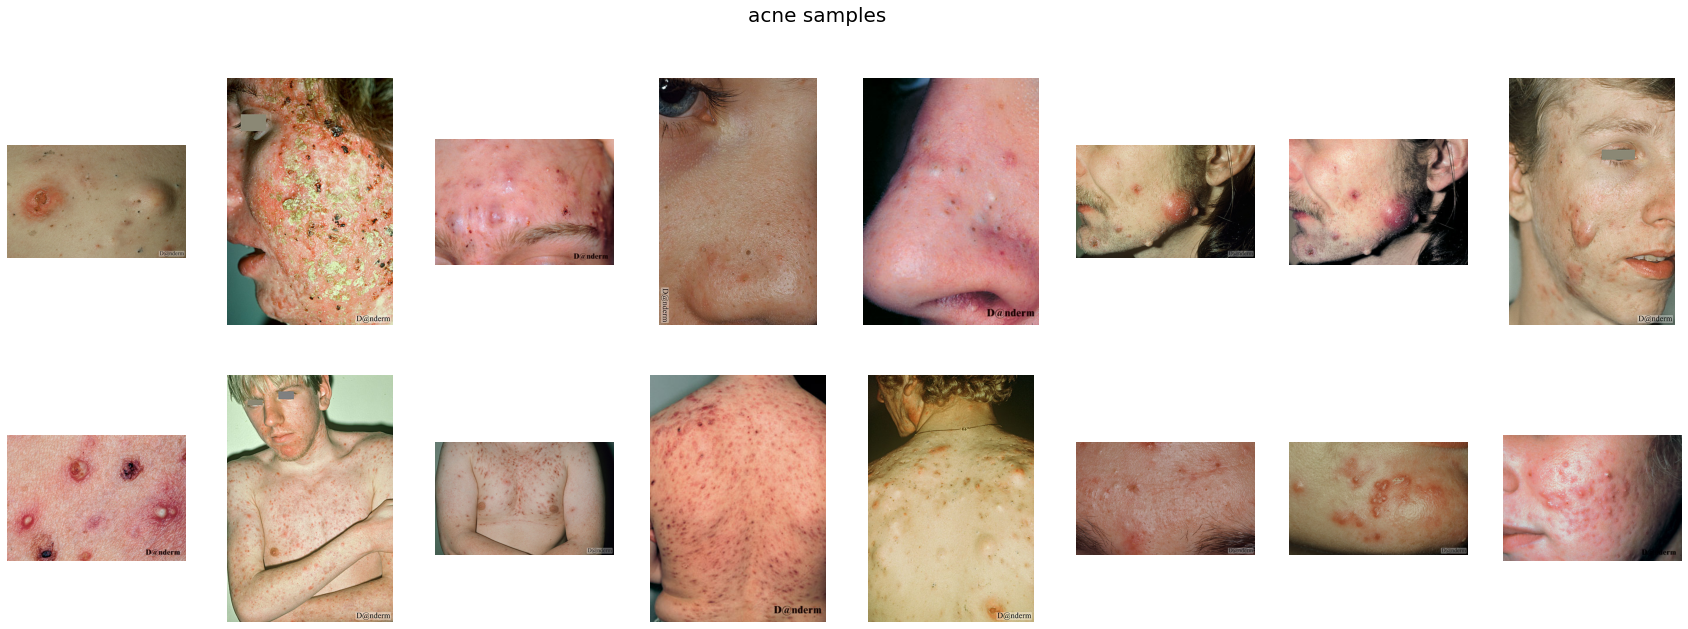

In [14]:
visualize_samples('acne')

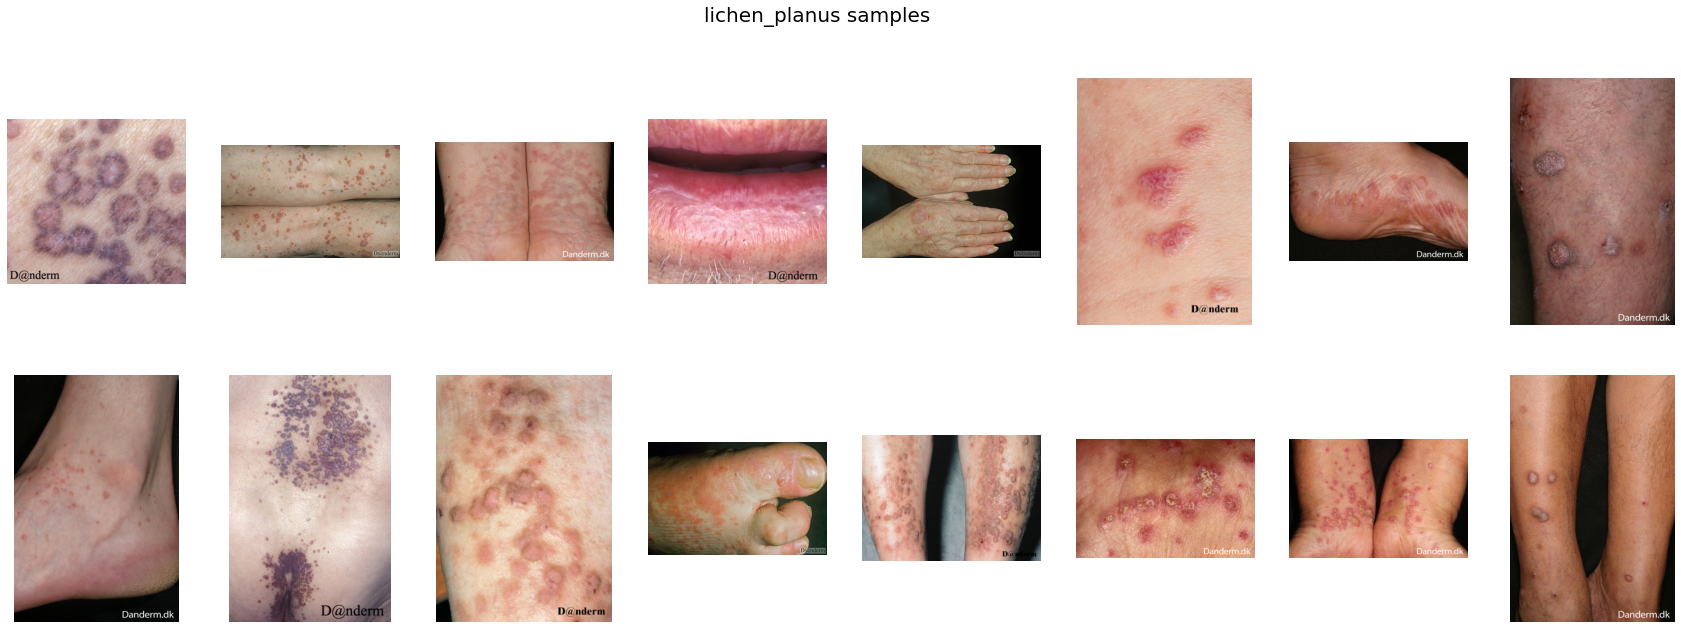

In [15]:
visualize_samples('lichen_planus')

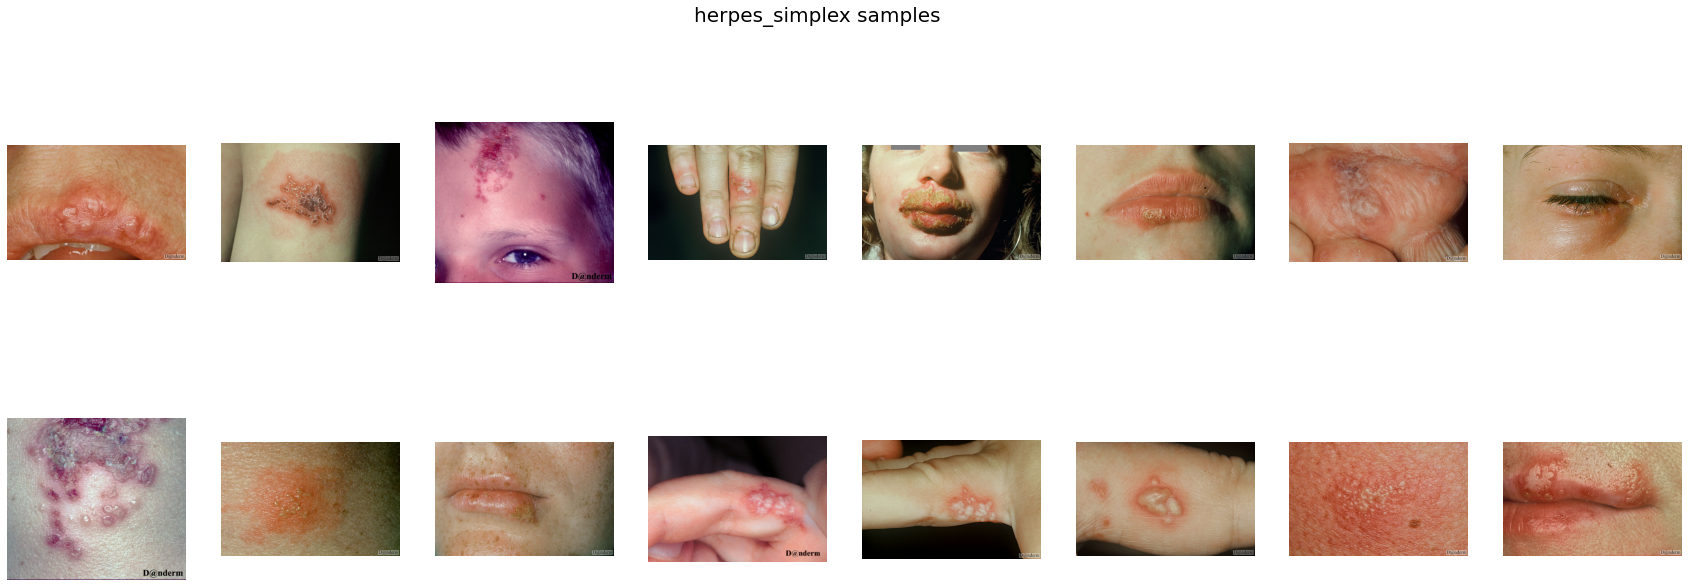

In [16]:
visualize_samples('herpes_simplex')

We observe that within the same class, there are many variations between the images. For example, with the same class, we observe different luminosities, different parts of the body, different angles and different scales.

 There are three key challenges associated with this dataset. 



1.   Challenge 1: **Learning from an imbalance dataset**. The dataset is imbalanced considering the fact that there are only 16 images of herpes simplex. We need to take this information into account during the training of the different models. 

2.   Challenge 2: **Efficient learning from limited labeled data**. One of the key challenges here from a machine-learning perspective is a limited amount of labeled data. Learning useful representations from little training data is arduous. The model can easily overfit on the small training set. 

3. Challenge 3: **Finding disentangled representations** A crucial element in extracting information features from high dimensional structured data is the disentanglement of sources of variations in the data. 

